# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Michael Rahadiyan Wijaya
- **Email:** michael.rwi03@gmail.com
- **ID Dicoding:** michaelrwi03

## Menentukan Pertanyaan Bisnis

- Musim apakah yang memiliki total pengguna Sepeda terbanyak?
- Bagaimana Korelasi antara Cuaca dengan jumlah pengguna Sepeda?
-  Cuaca apa yang digemari untuk meminjam sepeda?
- Bagaimana Tren Peminjaman Sepeda Bedasarkan Bulan ?
- Apakah hari libur mempengaruhi peminjaman sepeda?

---



## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/michaelrwijaya/Bike-Sharing-EDA/main/Dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
day_df = pd.read_csv('https://raw.githubusercontent.com/michaelrwijaya/Bike-Sharing-EDA/main/Dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [ ]:
print('\nJumlah Nilai Null Pada Tiap Kolom hour_df :\n', hour_df.isna().sum())
print('\nJumlah Nilai Null Pada Tiap Kolom day_df :\n', day_df.isna().sum())


Jumlah Nilai Null Pada Tiap Kolom hour_df :
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Nilai Null Pada Tiap Kolom day_df :
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print("\nJumlah duplikasi hour_df: \n", hour_df.duplicated().sum())
print("\nJumlah duplikasi day_df: \n", day_df.duplicated().sum())


Jumlah duplikasi hour_df: 
 0

Jumlah duplikasi day_df: 
 0


In [ ]:
hour_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [ ]:
day_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


### Cleaning Data

In [ ]:
# Mengganti Tipe Data Yang Salah
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [ ]:
print('df_day["dteday"] : ', day_df["dteday"].dtypes)
print('df_hour["dteday"] : ', hour_df["dteday"].dtypes)

df_day["dteday"] :  datetime64[ns]
df_hour["dteday"] :  datetime64[ns]


In [ ]:
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [ ]:
# Mengganti Nilai Sesuai dengan README.txt
day_df.season.replace((1,2,3,4), ('Springer', 'Summer', 'Fall', 'Winter'), inplace=True)

day_df.yr.replace((0,1), (2011,2012), inplace=True)

day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)


day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

day_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

In [ ]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

In [ ]:
# Mengganti Nilai Sesuai dengan README.txt
hour_df.season.replace((1,2,3,4), ('Springer', 'Summer', 'Fall', 'Winter'), inplace=True)

hour_df.yr.replace((0,1), (2011,2012), inplace=True)

hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)


hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

hour_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

In [ ]:
streamlit_data = day_df.to_csv('bike_rental_data.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore Hubungan Variabel Season dengan Cnt, Casual dan Registered

In [ ]:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"],
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"]

})

cnt                                 casual                    \
           max   min         mean          std    max  min         mean   
season                                                                    
Springer  7836   431  2604.132597  1399.942119   3155    9   334.928177   
Summer    8362   795  4992.331522  1695.977235   3410  120  1106.097826   
Fall      8714  1115  5644.303191  1459.800381   3160  118  1202.611702   
Winter    8555    22  4728.162921  1699.615261   3031    2   729.112360   

                     registered                                 
                 std        max  min         mean          std  
season                                                          
Springer  387.655561       5315  416  2269.204420  1200.269751  
Summer    737.590829       6456  674  3886.233696  1353.375628  
Fall      595.975032       6917  889  4441.691489  1304.626949  
Winter    606.318118       6946   20  3999.050562  1444.782557

### Explore Hubungan Variabel Weather dengan Cnt, Casual dan Registered

In [ ]:
day_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std"],
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"]

})

cnt                                casual                  \
                 max  min         mean          std    max min        mean   
weathersit                                                                   
Clear           8714  431  4876.786177  1879.483989   3410  15  964.030238   
Misty           8362  605  4035.862348  1809.109918   3155   9  687.352227   
Light_RainSnow  4639   22  1803.285714  1240.284449   1264   2  185.476190   

                           registered                                 
                       std        max  min         mean          std  
weathersit                                                            
Clear           700.476488       6946  416  3912.755940  1533.347265  
Misty           619.082767       6844  491  3348.510121  1463.566884  
Light_RainSnow  260.975022       4324   20  1617.809524  1068.290954

### Explore Hubungan Variabel Musim dengan Temperature, Humidity, dan Wind Speed

In [ ]:
day_df.groupby(by="season").agg({
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed" : ["max", "min", "mean", "std"]

})

temp                                     hum            \
               max       min      mean       std       max       min   
season                                                                 
Springer  0.572500  0.059130  0.297748  0.102735  0.948261  0.000000   
Summer    0.808333  0.253043  0.544405  0.122650  0.922500  0.254167   
Fall      0.861667  0.469167  0.706309  0.070848  0.939565  0.360000   
Winter    0.657500  0.220833  0.422906  0.107834  0.972500  0.333478   

                             windspeed                                
              mean       std       max       min      mean       std  
season                                                                
Springer  0.582903  0.151880  0.507463  0.045408  0.214537  0.086439  
Summer    0.626948  0.152841  0.388067  0.065929  0.203507  0.071629  
Fall      0.633482  0.119349  0.375617  0.064071  0.172095  0.059526  
Winter    0.668719  0.131248  0.422275  0.022392  0.171995  0.081565

### Explore Hubungan Variabel Tahun Dan Musimg dengan Jumlah Peminjam Sepeda

In [ ]:
day_df.groupby(by=["yr", "season"]).agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

cnt  casual  registered
yr   season                              
2011 Springer  150000   21425      128575
     Summer    347316   77564      269752
     Fall      419650   95450      324200
     Winter    326137   52813      273324
2012 Springer  321348   39197      282151
     Summer    571273  125958      445315
     Fall      641479  130641      510838
     Winter    515476   76969      438507

### Explore Distribusi Jumlah Tipe Peminjam Sepeda

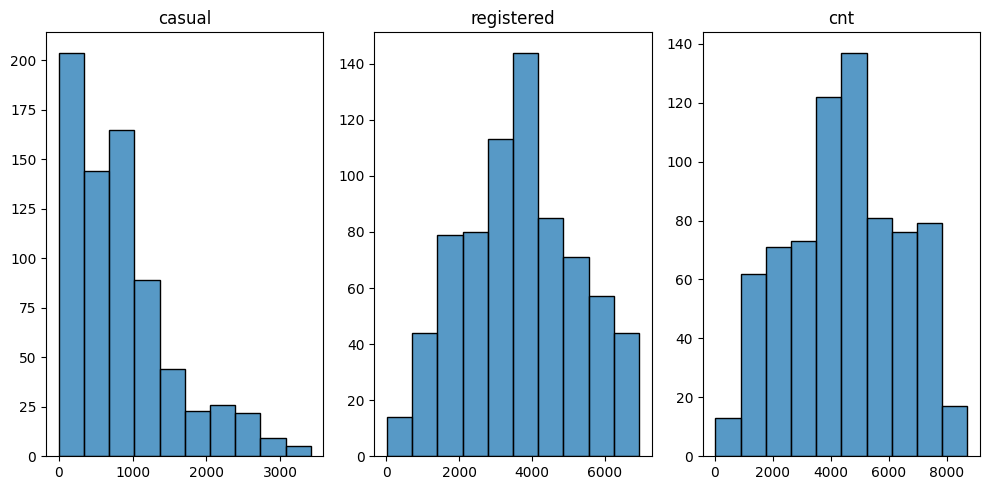

In [ ]:
columns = ['casual', 'registered', 'cnt']

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.histplot(x=day_df[columns[i]], ax=ax, bins=10)
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

### Explore Korelasi Antar Variabel

<ipython-input-17-c3bc474d004e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(day_df.corr(), annot = True)


<Axes: >

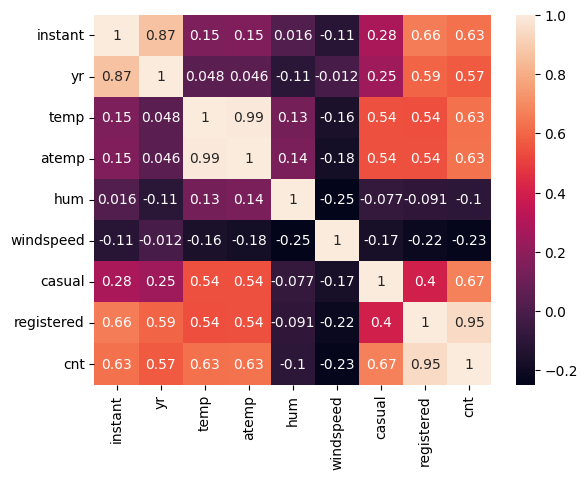

In [ ]:
sns.heatmap(day_df.corr(), annot = True)

## Visualization & Explanatory Analysis

### Pertanyaan 1:Musim apakah yang memiliki total pengguna Sepeda terbanyak?

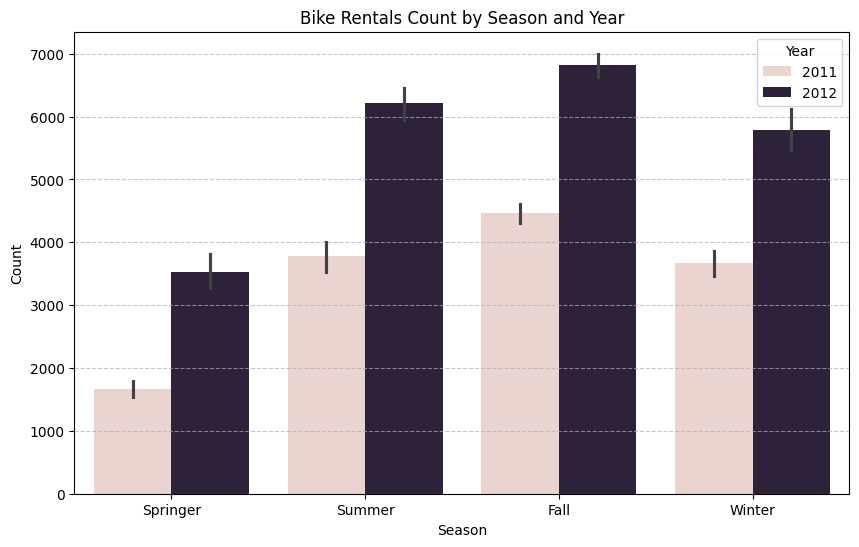

In [ ]:
plt.figure(figsize=(10, 6))
br = sns.barplot(x='season', y='cnt', data=day_df, hue = 'yr')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Bike Rentals Count by Season and Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
br.legend(title='Year', loc='upper right')

plt.show()

Insight : Musim Fall memiliki jumlah peminjaman terbanyak baik 2011 dan 2012

### Pertanyaan 2:  Bagaimana Korelasi antara Suhu dengan jumlah pengguna Sepeda?

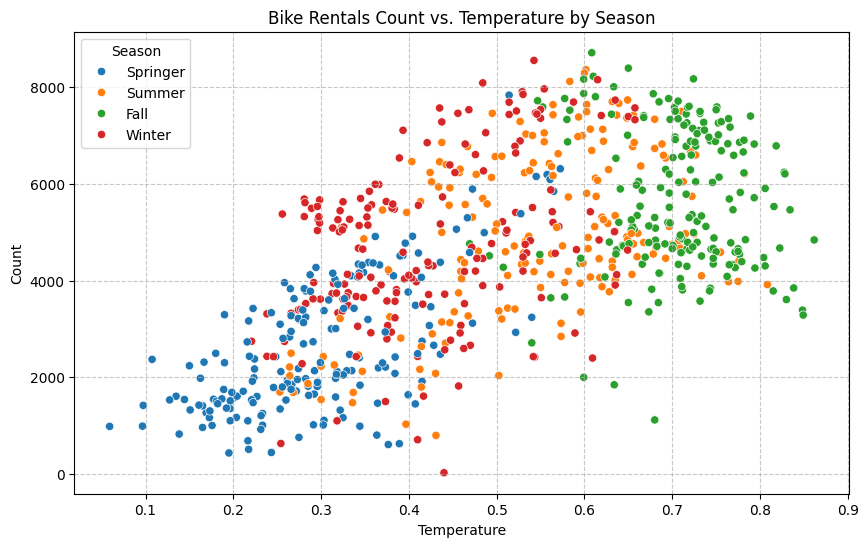

In [ ]:
plt.figure(figsize=(10, 6))
sc = sns.scatterplot(data = day_df, x = 'temp', y ='cnt' , hue = 'season')

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Bike Rentals Count vs. Temperature by Season')
sc.legend(title='Season', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Insight : Variabel Suhu memiliki korelasi yang positif terhadap jumlah peminjam sepeda, hal ini mengartikan bahwa orang suka suhu yang tidak terlalu dingin dan terlalu panas untuk meminjam sepeda

### Pertanyaan 3:  Cuaca apa yang digemari untuk meminjam sepeda?

<ipython-input-36-97cd1cf10dd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, palette = "mako")


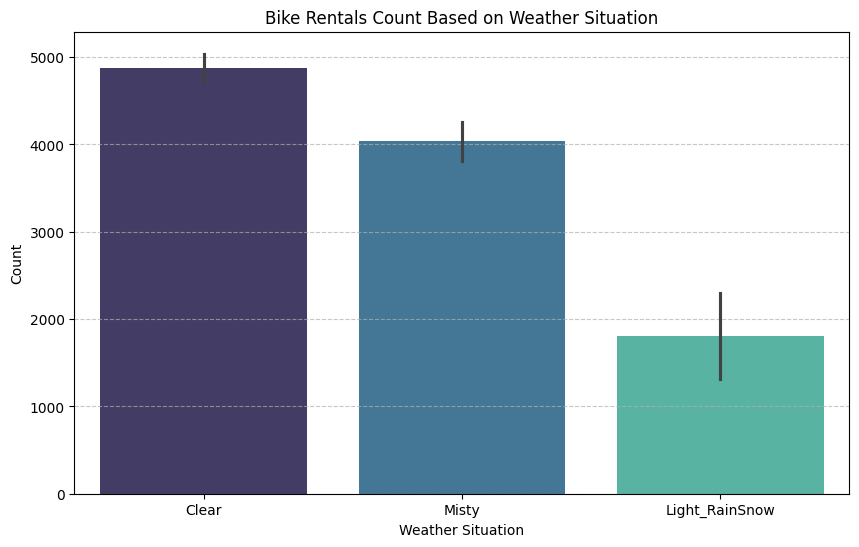

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_df, palette = "mako")

plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.title('Bike Rentals Count Based on Weather Situation')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Insight : Cuaca yang Clear memiliki jumlah peminjam sepeda yang banyak, berarti orang cenderung suka meminjam sepeda apabila cuaca yang tepat untuk berkegiatan diluar

### Pertanyaan 4 : Bagaimana Tren Peminjaman Sepeda Bedasarkan Bulan ?

<ipython-input-43-0a9653365f9f>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = day_df, x= 'mnth', y = 'cnt', palette ='mako')


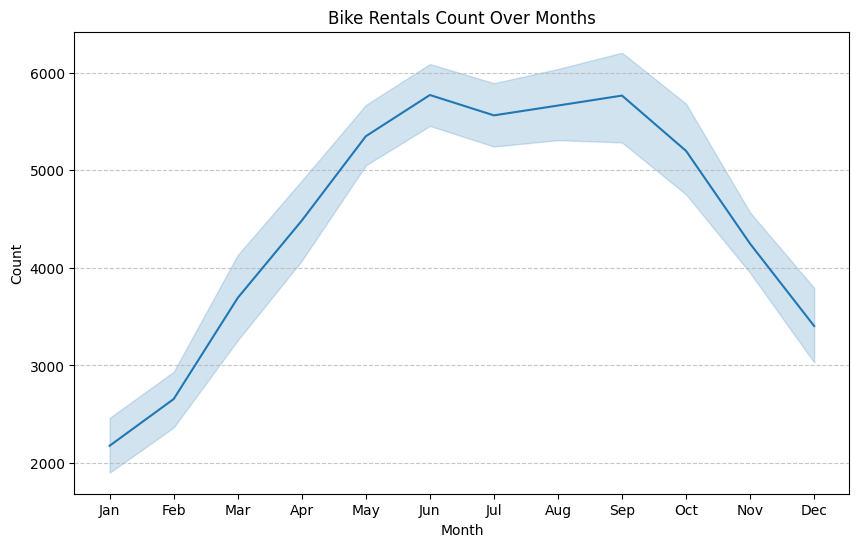

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = day_df, x= 'mnth', y = 'cnt')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Bike Rentals Count Over Months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight : Puncak tren peminjaman sepeda ada pada bulan Juni, hal ini sesuai dengan suhu dan musim yang ada saat bulan juni, yakni musim fall dengan suhu tidak terlalu panas dan dingin sehingga sesuai untuk meminjam sepeda

### Pertanyaan 5 : Apakah hari libur mempengaruhi peminjaman sepeda?

<ipython-input-46-b033ff01ae11>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='workingday', y='cnt', data=day_df, palette = "mako")


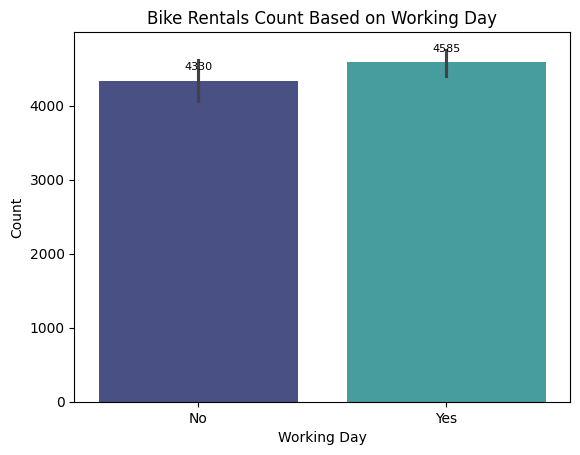

In [ ]:
bar = sns.barplot(x='workingday', y='cnt', data=day_df, palette = "mako")

plt.xlabel('Working Day')
plt.ylabel('Count')
plt.title('Bike Rentals Count Based on Working Day')

for p in bar.patches:
    bar.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

Insight : Hari libur tidak terlalu mempengaruhi Jumlah Peminjaman Sepeda

## Conclusion

- Conclution pertanyaan 1 : Menunjukkan bahwa jumlah peminjaman sepeda cenderung meningkat secara signifikan selama musim Fall, baik pada tahun 2011 maupun 2012. Hal ini bisa disebabkan oleh kondisi cuaca yang nyaman dan pemandangan Fall.
- Conclution pertanyaan 2 : Korelasi positif antara suhu dan jumlah peminjam sepeda dapat dijelaskan oleh preferensi manusia terhadap suhu yang moderat. Orang cenderung memilih beraktivitas di luar saat suhu tidak terlalu panas atau dingin, sehingga meminjam sepeda menjadi pilihan yang populer.
- Conclution pertanyaan 3  : Cuaca yang cerah (Clear) berkorelasi dengan peningkatan jumlah peminjam sepeda. Kondisi cuaca yang baik memberikan kesempatan untuk aktivitas luar, seperti bersepeda, yang dapat meningkatkan minat masyarakat.
- Conclution Pertanyaan 4 : Fakta bahwa puncak tren peminjaman terjadi pada bulan Juni dapat dijelaskan oleh kondisi musim dan suhu yang optimal pada saat itu. Bulan ini menawarkan suhu yang nyaman dan berada di tengah musim Fall, di mana banyak orang cenderung lebih aktif di luar ruangan.
- Conclution Pertanyaan 5 : Meskipun hari libur sering kali memengaruhi pola aktivitas masyarakat, insight ini menunjukkan bahwa peminjaman sepeda relatif stabil selama hari-hari libur. Ini mungkin disebabkan oleh sifat kegiatan bersepeda yang fleksibel dan dapat dilakukan kapan saja, termasuk hari-hari libur.